# Global feedbacks analysis in CNRM-CM6-1 PPE
Here we want to read the global annual mean of the radiative budget and air surface temperature in the amip and amip-futre4K PPE. We then compute the global feedbacks over the five years simulated, and plot a linegraph of the results across the ensemble. 

# Importe modules

In [1]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *
#import geopandas

# Plotting modules 
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
import seaborn as sns

# Functions definition

In [2]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions
from Fonctions import get_wavg_budget_df
from Fonctions import wavg 
from Fonctions import plotlines_Xdf
from Fonctions import plotlines_1df
from Fonctions import Deltas_Lambda
from Fonctions import Deltas_SW
from Fonctions import Deltas_LW

# Read files : radiative budget, tas

## Second PPE : amip and amip-future4K

In [3]:
path_official='/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/'
path_PPE='/data/scratch/globc/peatier/CNRM-CM6-1_PPE/'
variables = ['rlut', 'rsut','rsdt','tas']

path = path_official
filename = '*_CNRM-CM6-1_amip_*.nc'
start_yr = 1979
drop = True
year_list = range(1982,2015,1)
official_amip = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
official_amip

path = path_official
filename = '*_CNRM-CM6-1_amip-future4K_*.nc'
start_yr = 1979
drop = True
year_list = range(1982,2015,1)
official_future4K = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
official_future4K

,rlut,rsut,rsdt,tas,F,H,N
0,246.033493,100.208107,340.698730,291.714813,340.698730,346.241608,-5.542877
1,246.036575,100.286873,340.691254,291.756744,340.691254,346.323456,-5.632202
2,246.216858,100.169746,340.688416,291.737305,340.688416,346.386597,-5.698181


In [4]:
path_official='/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/'
path_PPE='/data/scratch/globc/peatier/CNRM-CM6-1_PPE/ENSEMBLE1/'
variables = ['rlut', 'rsut','rsdt','tas']

path = path_PPE+'/CNRM-CM6-1_amip_PPE/CNRM-CM6-1_amip_r1i1p1f2/'
filename = '*_CNRM-CM6-1_amip_*.nc'
start_yr = 1979
drop = False
year_list = None
p1_amip = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
p1_amip

start_yr = 1951
path = path_PPE+'/CNRM-CM6-1_amip-future4K_PPE/CNRM-CM6-1_amip-future4K_r1i1p1f2/'
filename = '*_CNRM-CM6-1_amip-future4K_*.nc'
p1_future4K = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
p1_future4K

,rlut,rsut,rsdt,tas,F,H,N
0,245.847061,99.844887,340.496674,291.295715,340.496674,345.691956,-5.195282
1,245.930023,100.026192,340.500641,291.433716,340.500641,345.956207,-5.455566
2,246.320786,99.984657,340.466858,291.496887,340.466858,346.305450,-5.838593
3,246.335007,99.894569,340.467224,291.325195,340.467224,346.229584,-5.762360
4,246.418381,99.600266,340.520782,291.306335,340.520782,346.018646,-5.497864


In [5]:
nb_p_list_LHS500 = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412',
                    'p414','p416',
                    'p413','p419','p424','p426','p428','p421','p423',
                    'p425','p427','p429','p430','p436','p438','p431','p433',
                    'p442','p446','p443','p445','p447',
                    'p452','p454','p456','p458','p457','p459',
                    'p460','p465','p467','p469',
                    'p470','p471']
len(nb_p_list_LHS500)

102

In [6]:
path_official='/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/'
path_PPE='/data/scratch/globc/peatier/CNRM-CM6-1_PPE/ENSEMBLE2/'
variables = ['rlut', 'rsut','rsdt','tas']

# The amip experiments, new ensemble LHS500 : 

start_yr=1979
drop=False
year_list=None
nb_p_list_LHS500 = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412',
                    'p414','p416',
                    'p413','p419','p424','p426','p428','p421','p423',
                    'p425','p427','p429','p430','p436','p438','p431','p433',
                    'p442','p446','p443','p445','p447',
                    'p452','p454','p456','p458','p457','p459',
                    'p460','p465','p467','p469',
                    'p470','p471']
N=len(nb_p_list_LHS500)
amip_LHS500={}
i = 0
while i<N:
    nb_p_LHS500 = nb_p_list_LHS500[i]
    print(nb_p_LHS500)
    path=path_PPE+'CNRM-CM6-1_amip_LHS500_PPE/CNRM-CM6-1_amip_r1i1'+nb_p_LHS500+'f2/'
    filename = '*_CNRM-CM6-1_amip_r1i1'+nb_p_LHS500+'f2*.nc'
    amip_LHS500[str(nb_p_LHS500) + "_amip"] = get_wavg_budget_df(path, filename, variables, \
                                                                start_yr, drop, year_list)
    i=i+1
    

p311
p312
p314
p316
p317
p319
p320
p321
p322
p324
p325
p326
p329
p330
p331
p332
p335
p336
p337
p338
p340
p341
p343
p344
p346
p347
p348
p349
p350
p353
p355
p357
p359
p360
p361
p363
p365
p367
p368
p369
p372
p373
p374
p375
p376
p378
p381
p382
p384
p386
p388
p389
p391
p392
p393
p394
p395
p396
p398
p399
p400
p404
p406
p407
p409
p410
p411
p412
p414
p416
p413
p419
p424
p426
p428
p421
p423
p425
p427
p429
p430
p436
p438
p431
p433
p442
p446
p443
p445
p447
p452
p454
p456
p458
p457
p459
p460
p465
p467
p469
p470
p471


In [7]:
path_official='/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/'
path_PPE='/data/scratch/globc/peatier/CNRM-CM6-1_PPE/ENSEMBLE2/'
variables = ['rlut', 'rsut','rsdt','tas']

# The amip experiments, new ensemble LHS500 : 

start_yr=1979
drop=False
year_list=None
nb_p_list_LHS500 = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412',
                    'p414','p416',
                    'p413','p419','p424','p426','p428','p421','p423',
                    'p425','p427','p429','p430','p436','p438','p431','p433',
                    'p442','p446','p443','p445','p447',
                    'p452','p454','p456','p458','p457','p459',
                    'p460','p465','p467','p469',
                    'p470','p471']
N=len(nb_p_list_LHS500)
future4K_LHS500={}
i = 0
while i<N:
    nb_p_LHS500 = nb_p_list_LHS500[i]
    print(nb_p_LHS500)
    path=path_PPE+'CNRM-CM6-1_amip-future4K_LHS500_PPE/CNRM-CM6-1_amip-future4K_r1i1'+nb_p_LHS500+'f2/'
    filename = '*_CNRM-CM6-1_amip-future4K_r1i1'+nb_p_LHS500+'f2*.nc'
    future4K_LHS500[str(nb_p_LHS500) + "_future4K"] = get_wavg_budget_df(path, filename, variables, \
                                                                start_yr, drop, year_list)
    i=i+1

p311
p312
p314
p316
p317
p319
p320
p321
p322
p324
p325
p326
p329
p330
p331
p332
p335
p336
p337
p338
p340
p341
p343
p344
p346
p347
p348
p349
p350
p353
p355
p357
p359
p360
p361
p363
p365
p367
p368
p369
p372
p373
p374
p375
p376
p378
p381
p382
p384
p386
p388
p389
p391
p392
p393
p394
p395
p396
p398
p399
p400
p404
p406
p407
p409
p410
p411
p412
p414
p416
p413
p419
p424
p426
p428
p421
p423
p425
p427
p429
p430
p436
p438
p431
p433
p442
p446
p443
p445
p447
p452
p454
p456
p458
p457
p459
p460
p465
p467
p469
p470
p471


## Create plot

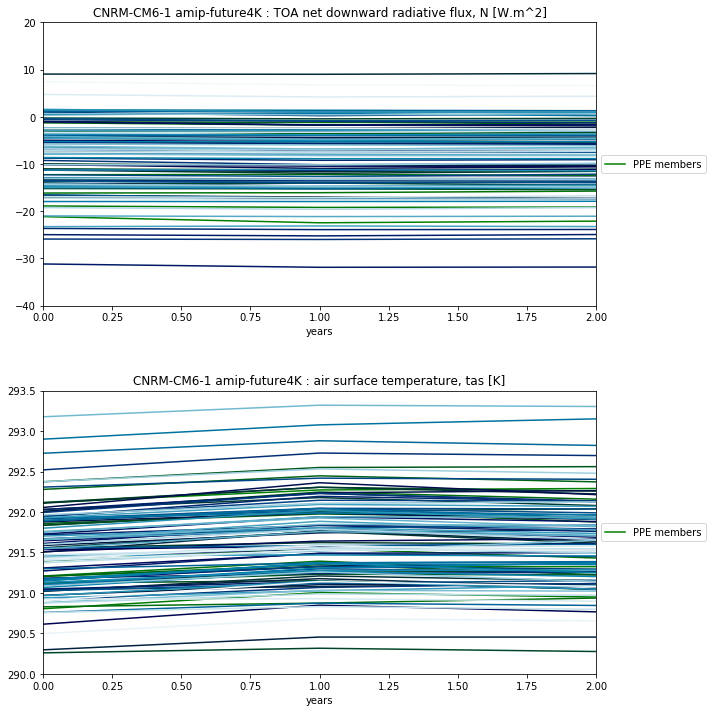

In [8]:
# PARAMETERS :
n=len(future4K_LHS500)
df=[None]*n
#df[0] = official_future4K
#df[1] = p1_future4K
df[:] = [future4K_LHS500[i+"_future4K"] for i in nb_p_list_LHS500]
cmap1 = plt.get_cmap('ocean')
colors = [cmap1(i) for i in np.linspace(0, 1, (len(future4K_LHS500)+2))]
linewidth = [1.5]
i=0
N=len(df)
while i<N:
    linewidth.append(1.5)
    i=i+1
    
xlabel = 'years'
xmin = 0
xmax = 2
legend = ['PPE members']

# Plot of lines from different dataframes
plt.subplots(figsize=(10,10)) 

plt.subplot(211)
title = 'CNRM-CM6-1 amip-future4K : TOA net downward radiative flux, N [W.m^2]'
y = 'N'
ymin = -40.0
ymax = 20.0
plotlines_Xdf(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)

plt.subplot(212)
title='CNRM-CM6-1 amip-future4K : air surface temperature, tas [K]'
y = 'tas'
ymin = 290.0
ymax = 293.5
plotlines_Xdf(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.30)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/longPPE_N_tas_future4K.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

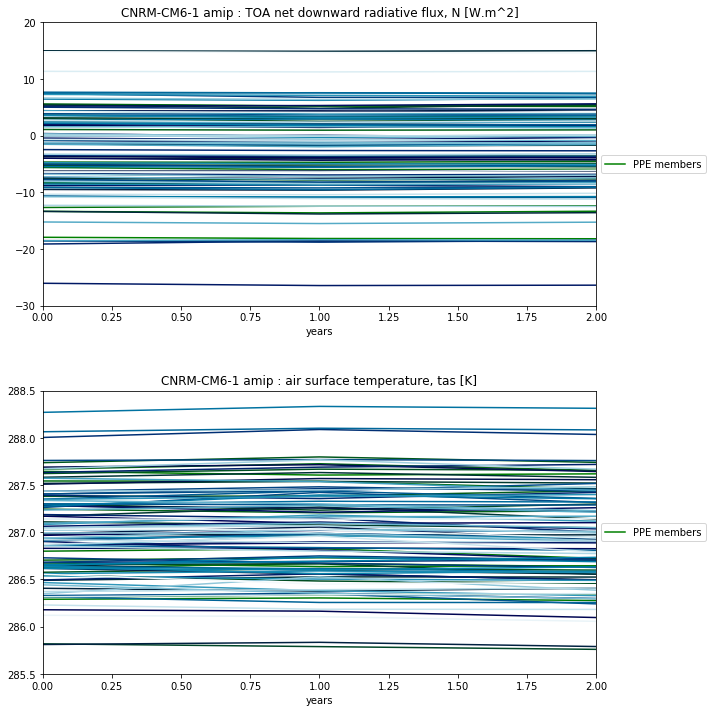

In [9]:
# PARAMETERS :
n=len(amip_LHS500)
df=[None]*n
#df[0] = official_amip
#df[1] = p1_amip
df[:] = [amip_LHS500[i+"_amip"] for i in nb_p_list_LHS500]
cmap1 = plt.get_cmap('ocean')
colors = [cmap1(i) for i in np.linspace(0, 1, len(amip_LHS500)+2)]
linewidth = [1.5]
i=0
N=len(df)
while i<N:
    linewidth.append(1.5)
    i=i+1
    
xlabel = 'years'
xmin = 0
xmax = 2
legend = ['PPE members']

# Plot of lines from different dataframes
plt.subplots(figsize=(10,10)) 

plt.subplot(211)
title = 'CNRM-CM6-1 amip : TOA net downward radiative flux, N [W.m^2]'
y = 'N'
ymin = -30.0
ymax = 20.0
plotlines_Xdf(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)

plt.subplot(212)
title='CNRM-CM6-1 amip : air surface temperature, tas [K]'
y = 'tas'
ymin = 285.5
ymax = 288.5
plotlines_Xdf(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.30)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/longPPE_N_tas_amip.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

# Save TOA radiative budget N

In [8]:
amipN_list = []

for i in nb_p_list_LHS500 :
    tmp = amip_LHS500[i+'_amip']['N'].mean()
    amipN_list.append(tmp)
    
len(amipN_list)

102

In [9]:
official_N = official_amip['N'].mean()
official_N

0.51083374

In [10]:
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/TOA_budget_N.npy', amipN_list)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/official_TOA_budget_N.npy', official_N)

# Compute : Delta(TOA), Delta(tas), Lambda

In [11]:
official_amip

,rlut,rsut,rsdt,tas,F,H,N
0,238.267899,101.744835,340.698730,286.938538,340.698730,340.012726,0.686005
1,238.770569,101.704056,340.691254,287.068726,340.691254,340.474609,0.216644
2,238.196167,101.862389,340.688416,286.955109,340.688416,340.058563,0.629852


In [12]:
result = pd.DataFrame()
df_CTL = official_amip
df = official_future4K
expe_name = 'official_future4K'
n = len(df_CTL)
official_result = Deltas_Lambda(result, df_CTL, df, expe_name, n)

result = pd.DataFrame()
official_result_SW = Deltas_SW(result, df_CTL, df, expe_name, n)

result = pd.DataFrame()
official_result_LW = Deltas_LW(result, df_CTL, df, expe_name, n)
official_result_LW

,Delta_LW_official_future4K,Delta_tas_official_future4K,Lambda_LW_official_future4K
0,7.765594,4.776276,1.625868
1,7.515800,4.732147,1.588243
2,7.684097,4.748830,1.618103


In [13]:
result = pd.DataFrame()
df_CTL = p1_amip
df = p1_future4K
expe_name = 'p1_future4K'
n = len(df_CTL)
p1_result = Deltas_Lambda(result, df_CTL, df, expe_name, n)

result = pd.DataFrame()
p1_result_SW = Deltas_SW(result, df_CTL, df, expe_name, n)

result = pd.DataFrame()
p1_result_LW = Deltas_LW(result, df_CTL, df, expe_name, n)
p1_result_LW

,Delta_LW_p1_future4K,Delta_tas_p1_future4K,Lambda_LW_p1_future4K
0,7.563141,4.375641,1.728465
1,7.624748,4.408966,1.729373
2,7.757507,4.479523,1.731771
3,7.834129,4.450424,1.760311
4,7.894696,4.420733,1.785834


In [14]:
# We want to compute the Deltas and the feedbacks of each perturbations (amip - amip-future4K)
result= pd.DataFrame()

n = len(amip_LHS500["p311_amip"])

for j in nb_p_list_LHS500:
    df_CTL = amip_LHS500[j+"_amip"]
    df = future4K_LHS500[j+"_future4K"]
    expe_name=str(j+"_future4k")
       
    Lambda = Deltas_Lambda(result, df_CTL, df, expe_name, n)
    Lambda_SW = Deltas_SW(result, df_CTL, df, expe_name, n)
    Lambda_LW = Deltas_LW(result, df_CTL, df, expe_name, n)
    
Lambda_SW

,Delta_N_p311_future4k,Delta_tas_p311_future4k,Lambda_p311_future4k,Delta_SW_p311_future4k,Lambda_SW_p311_future4k,Delta_LW_p311_future4k,Lambda_LW_p311_future4k,Delta_N_p312_future4k,Delta_tas_p312_future4k,Lambda_p312_future4k,...,Lambda_SW_p470_future4k,Delta_LW_p470_future4k,Lambda_LW_p470_future4k,Delta_N_p471_future4k,Delta_tas_p471_future4k,Lambda_p471_future4k,Delta_SW_p471_future4k,Lambda_SW_p471_future4k,Delta_LW_p471_future4k,Lambda_LW_p471_future4k
0,-3.211578,4.470459,-0.718400,-5.653831,-1.264709,8.865417,1.983111,-7.642731,4.529877,-1.687183,...,-0.624443,8.945221,2.044151,-7.385223,4.349915,-1.697786,-0.432991,-0.099540,7.818207,1.797324
1,-4.299744,4.568604,-0.921358,-5.581573,-1.221724,9.337234,2.043783,-7.590729,4.608215,-1.619682,...,-0.638094,9.244675,2.064783,-7.914185,4.519989,-1.687437,-0.703060,-0.155545,8.352753,1.847959
2,-3.905609,4.603088,-0.835950,-5.661407,-1.229915,9.467052,2.056674,-7.825562,4.632223,-1.672044,...,-0.623782,9.349564,2.069643,-7.999725,4.549927,-1.735373,-0.708244,-0.155661,8.474614,1.862583


## To store feedbacks and Delta T values in numpy arrays

In [14]:
official_NetFdbck = official_result['Lambda_official_future4K'].mean()
official_SW = official_result_SW['Lambda_SW_official_future4K'].mean()
official_LW = official_result_LW['Lambda_LW_official_future4K'].mean()

p1_NetFbck = p1_result['Lambda_p1_future4K'].mean()
p1_SW = p1_result_SW['Lambda_SW_p1_future4K'].mean()
p1_LW = p1_result_LW['Lambda_LW_p1_future4K'].mean()

# Save the numpy array in a file   
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/Net_feedbacks_official.npy', official_NetFdbck)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/SW_feedbacks_official.npy', official_SW)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LW_feedbacks_official.npy', official_LW)

np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/Net_feedbacks_p1.npy', p1_NetFbck)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/SW_feedbacks_p1.npy', p1_SW)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LW_feedbacks_p1.npy', p1_LW)

In [17]:
# List nouvel ensemble LHS500
nb_p_list_LHS500 =  ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412',
                    'p414','p416',
                    'p413','p419','p424','p426','p428','p421','p423',
                    'p425','p427','p429','p430','p436','p438','p431','p433',
                    'p442','p446','p443','p445','p447',
                    'p452','p454','p456','p458','p457','p459',
                    'p460','p465','p467','p469',
                    'p470','p471']
#N1=len(nb_p_list)
N2=len(nb_p_list_LHS500) 
NetFdbck = [1]*(N2)
Fdbck_SW = [1]*(N2)
Fdbck_LW = [1]*(N2)
i=0
while i<N2:
    nb_p = nb_p_list_LHS500[i]
    #print(nb_p)
    NetFdbck[i] = Lambda['Lambda_'+str(nb_p)+'_future4k'].mean()
    Fdbck_SW[i] = Lambda_SW['Lambda_SW_'+str(nb_p)+'_future4k'].mean()
    Fdbck_LW[i] = Lambda_LW['Lambda_LW_'+str(nb_p)+'_future4k'].mean()
    i=(i+1)

NetFdbck

[-0.8252360423405966,
 -1.659636378288269,
 -1.2150004307428997,
 -1.3216408093770344,
 -0.750397264957428,
 -1.4206021626790364,
 -1.4408226013183594,
 -1.4064022302627563,
 -1.461706558863322,
 -1.3787020444869995,
 -1.498623251914978,
 -1.224881688753764,
 -1.5924741824467976,
 -1.2672473986943562,
 -1.3432101806004841,
 -1.0330911080042522,
 -1.302637259165446,
 -1.2236526012420654,
 -1.342150131861369,
 -1.007355789343516,
 -1.619483510653178,
 -1.5659398237864177,
 -1.2925693194071453,
 -1.316346526145935,
 -0.7337796886761984,
 -1.4032787879308064,
 -1.698190410931905,
 -1.508791486422221,
 -1.4513168732325237,
 -1.502699613571167,
 -1.2550796270370483,
 -1.4886308113733928,
 -1.3412543137868245,
 -1.4125794569651287,
 -1.4414617617925007,
 -1.5406382481257122,
 -1.5419385035832722,
 -1.5100051561991374,
 -1.5328312714894612,
 -0.8448257644971212,
 -1.1007804870605469,
 -1.1741574605305989,
 -1.4253347317377727,
 -1.2167373498280842,
 -1.0738131602605183,
 -1.36941397190094,
 -1

In [16]:
# Save the numpy array in a file   
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/Net_feedbacks.npy', NetFdbck)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/SW_feedbacks.npy', Fdbck_SW)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LW_feedbacks.npy', Fdbck_LW)

In [18]:
# List nouvel ensemble LHS500
nb_p_list_LHS500 = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412',
                    'p414','p416',
                    'p413','p419','p424','p426','p428','p421','p423',
                    'p425','p427','p429','p430','p436','p438','p431','p433',
                    'p442','p446','p443','p445','p447',
                    'p452','p454','p456','p458','p457','p459',
                    'p460','p465','p467','p469',
                    'p470','p471']


N2=len(nb_p_list_LHS500)
DeltaT_global_mean = [1]*(N2)

j=0
while j<N2:
    nb_p = nb_p_list_LHS500[j]
    #print(nb_p)
    DeltaT_global_mean[j] = result['Delta_tas_'+str(nb_p)+'_future4k'].mean()
    j=(j+1)
    
DeltaT_global_mean

[4.547383626302083,
 4.590104897816976,
 4.5840522448221845,
 4.643870035807292,
 4.6295115152994795,
 4.531504313151042,
 4.5570526123046875,
 4.5349273681640625,
 4.653617064158122,
 4.657396157582601,
 4.511025269826253,
 4.689097086588542,
 4.576224486033122,
 4.546244303385417,
 4.601504802703857,
 4.625400066375732,
 4.473765055338542,
 4.516693115234375,
 4.48582124710083,
 4.554384072621663,
 4.4269477526346845,
 4.5801544189453125,
 4.581856568654378,
 4.431052366892497,
 4.615736166636149,
 4.676571369171143,
 4.543102741241455,
 4.434897581736247,
 4.653825600941976,
 4.646074136098226,
 4.568188190460205,
 4.4668647448221845,
 4.623881022135417,
 4.53016996383667,
 4.6026611328125,
 4.568947633107503,
 4.548738320668538,
 4.543479124704997,
 4.371102174123128,
 4.542026042938232,
 4.621944904327393,
 4.4813232421875,
 4.5601127942403155,
 4.437467734018962,
 4.597676595052083,
 4.648079713185628,
 4.520150025685628,
 4.5670097668965655,
 4.6502753893534345,
 4.6481781005859

In [18]:
# Save the numpy array in a file
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/DeltaT_global_mean.npy', DeltaT_global_mean)

# Create plot

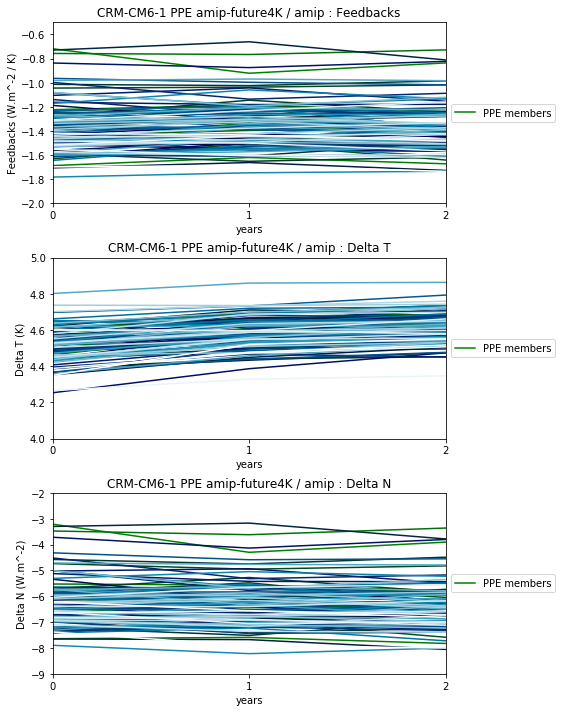

In [19]:
# PARAMETERS
df = result
cmap1 = plt.get_cmap('ocean')
xlabel='years'
xmin = 0
xmax = 2
legend=['PPE members']
linewidth = [1.5]

N=len(amip_LHS500)+1
j=0
while j<N:
    linewidth.append(1.5)
    j=j+1
#--------------------------- Plot result : future4K --------------------------------------
plt.subplots(figsize=(8,10))

#########################
plt.subplot(311)
title="CRM-CM6-1 PPE amip-future4K / amip : Feedbacks"
ymin = -2.0
ymax = -0.5

n=len(amip_LHS500)
colors = [cmap1(0)]*(n+len(amip_LHS500))
y=[None]*N
y[:] = ['Lambda_'+j+'_future4k' for j in nb_p_list_LHS500]
colors[:] = [cmap1(i) for i in np.linspace(0, 1, len(amip_LHS500))]

plotlines_1df(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)
plt.ylabel('Feedbacks (W.m^-2 / K)')
plt.xlim(0, 2)
plt.xticks([0, 1, 2])

#########################
plt.subplot(312)
title='CRM-CM6-1 PPE amip-future4K / amip : Delta T'
ymin = 4.0
ymax = 5.0


y[:] = ['Delta_tas_'+i+'_future4k' for i in nb_p_list_LHS500]
colors[:] = [cmap1(j) for j in np.linspace(0, 1, len(amip_LHS500))]

plotlines_1df(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)
plt.ylabel('Delta T (K)')
plt.xlim(0, 2)
plt.xticks([0, 1, 2])

#########################
plt.subplot(313)
title='CRM-CM6-1 PPE amip-future4K / amip : Delta N'
ymin = -9.0
ymax = -2.0

y[:] = ['Delta_N_'+i+'_future4k' for i in nb_p_list_LHS500]
colors[:] = [cmap1(i) for i in np.linspace(0, 1, len(amip_LHS500))]

plotlines_1df(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)
plt.ylabel('Delta N (W.m^-2)')
plt.xlim(0, 2)
plt.xticks([0, 1, 2])

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.30)

# Enregistrer la figure ...........

plt.savefig("/data/home/globc/peatier/figures/PPE_feedbacks_DT_DN.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Display the figure 
plt.show()

In [15]:
# Data from Rostron et al. (2020)
Fdbck_min_UK = -1.8
Fdbck_max_UK = -0.93

# Default model feedbacks
p1_feedbacks = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/Net_feedbacks_p1.npy')

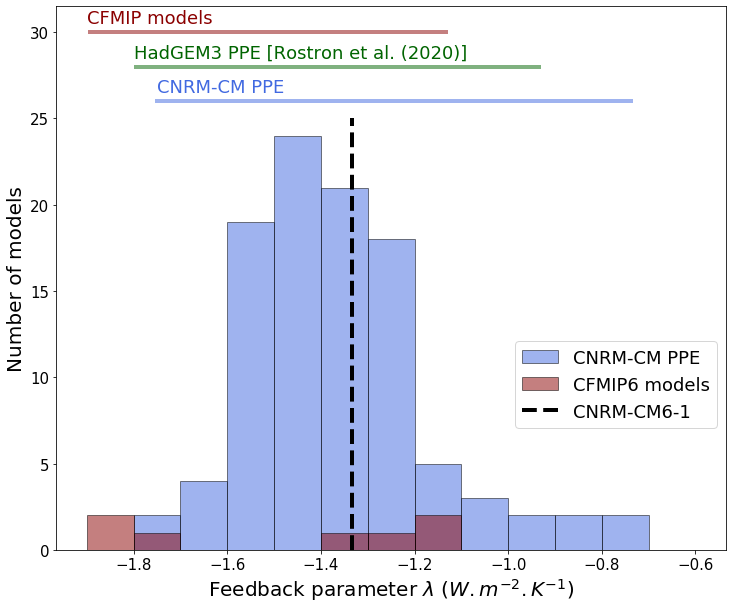

In [22]:
CMIP6 = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/CMIP6_NetFeedbcks.npy") 
emulated = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/emulated_NetFdbck.npy")

# Create plot of PDF of net feedbacks emulated by neural network 

Bins = [-1.8,-1.7,-1.6,-1.5,-1.4,-1.3,-1.2,-1.1,-1.0,-0.9,-0.8,-0.7,-0.6]
new_Bins = [-1.9, -1.8,-1.7,-1.6,-1.5,-1.4,-1.3,-1.2,-1.1,-1.0,-0.9,-0.8,-0.7,-0.6]

fig, ax = plt.subplots(figsize=(12,10))
ax = sns.distplot(NetFdbck, norm_hist= False, bins = Bins, kde = False, 
                  hist_kws={"alpha": 0.5, "color" : 'royalblue', "edgecolor" : "black"}, label = 'CNRM-CM PPE', ax=ax)
ax = sns.distplot(CMIP6, norm_hist=False, bins = new_Bins, kde = False,
                  hist_kws={"alpha": 0.5, "color" : 'darkred', "edgecolor" : "black"}, label= 'CFMIP6 models', ax=ax)
#ax = sns.distplot(emulated, norm_hist=False, kde = False, 
#                 hist_kws={"alpha": 0.2, "color" : 'darkred'}, label= 'random forest', ax=ax)

plt.vlines(p1_feedbacks,ymin = 0,ymax = 25,label='CNRM-CM6-1', colors='black', alpha=1.0, linewidth=4.0,
           linestyles='dashed')

plt.hlines(30.0,xmin = CMIP6.min(),xmax = CMIP6.max(), alpha=0.5,
           colors='darkred', linewidth=4.0, linestyles='solid')
plt.text(-1.9, 30.5, 'CFMIP models', color = 'darkred', fontsize=18)

plt.hlines(28.0,xmin = Fdbck_min_UK,xmax = Fdbck_max_UK, alpha=0.5,
           colors='darkgreen', linewidth=4.0, linestyles='solid')
plt.text(-1.8, 28.5, 'HadGEM3 PPE [Rostron et al. (2020)] ', color = 'darkgreen', fontsize=18)

plt.hlines(26.0,xmin = min(NetFdbck),xmax = max(NetFdbck), alpha=0.5,
           colors='royalblue', linewidth=4.0, linestyles='solid')
plt.text(-1.75, 26.5, 'CNRM-CM PPE', color = 'royalblue', fontsize=18)

ax.tick_params(axis='both', which='major', labelsize=15)
plt.legend(fontsize=18, bbox_to_anchor=(0,0,1,0.4))
#plt.title(title, fontsize = 22)
plt.xlabel('Feedback parameter $\lambda$ ($W.m^{-2}.K^{-1}$)',fontsize=20)
plt.ylabel('Number of models',fontsize=20)

# Enregistrer la figure ...........

plt.savefig("/data/home/globc/peatier/figures/PDF_feedbacks.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Display the figure 
plt.show()